# UMAP Analysis

This notebook illustrate how to analyze IDP ensembles in IDPET via [Uniform Manifold Approximation and Projection](https://arxiv.org/abs/1802.03426) (UMAP) implemented in [umap-learn](https://umap-learn.readthedocs.io/en/latest/).

## Load data from PED

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from dpet.ensemble import Ensemble
from dpet.ensemble_analysis import EnsembleAnalysis
from dpet.visualization import Visualization
from dpet.utils import set_verbosity


set_verbosity("INFO")  # Change verbosity level to show more information when performing the analysis.

ensembles = [
    Ensemble('PED00156e001', database='ped'),
    Ensemble('PED00157e001', database='ped'),
    Ensemble('PED00158e001', database='ped')
]

data_dir = None  # Add the path to a directory you wish in order to save the analysis
analysis = EnsembleAnalysis(ensembles, data_dir)
analysis.load_trajectories();

Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00156e001.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00157e001.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00158e001.
Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


## Featurization

Compute all vs all backbone RMSD of conformations from all ensembles.

In [2]:
analysis.extract_features(featurization='rmsd');

## Dimensionality Reduction

Perform UMAP.

In [3]:
analysis.reduce_features(
    method='umap',
    circular=False,
    min_dist=1,
    n_neighbors=[20, 30, 40],
    range_n_clusters=[2, 3, 4, 5, 6],
    num_dim=2,
    random_state=2025
);

UMAP is running...
/Users/giacomojanson/miniconda3/envs/idpet_0/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/giacomojanson/miniconda3/envs/idpet_0/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/giacomojanson/miniconda3/envs/idpet_0/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
Best number of neighbors: 30
Best number of clusters : 4
Reduced dimensionality ensemble shape: (100, 2)
Reduced dimensionality ensemble shape: (100, 2)
Reduced dimensionality ensemble shape: (88, 2)


## Analysis

In [4]:
vis = Visualization(analysis)

The preferred and comprehensive method for easily visualizing UMAP results is `dimensionality_reduction_scatter`.

Please see the `tsne_analysis.ipynb` notebook for more information.

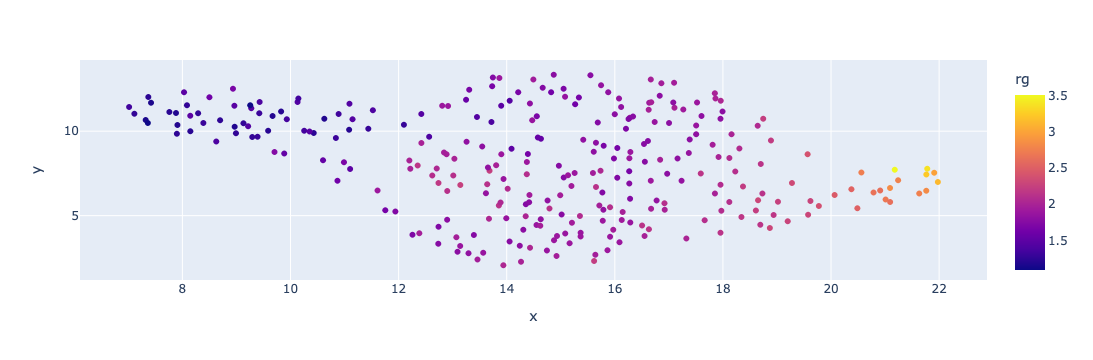

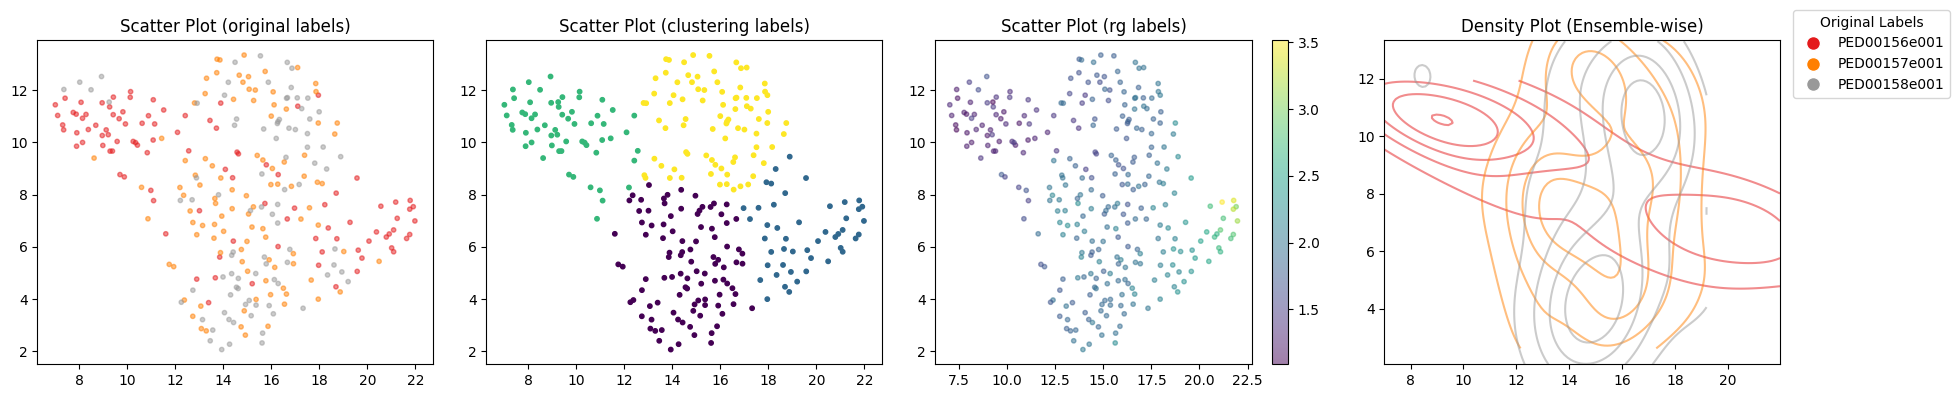

In [5]:
vis.dimensionality_reduction_scatter(
    color_by="rg", n_comp=2, plotly=True, kde_by_ensemble=True, cmap_label='viridis'
);

We can also directly access the UMAP features, in case we want to produce custom plots.

We illustrate this scenario below.

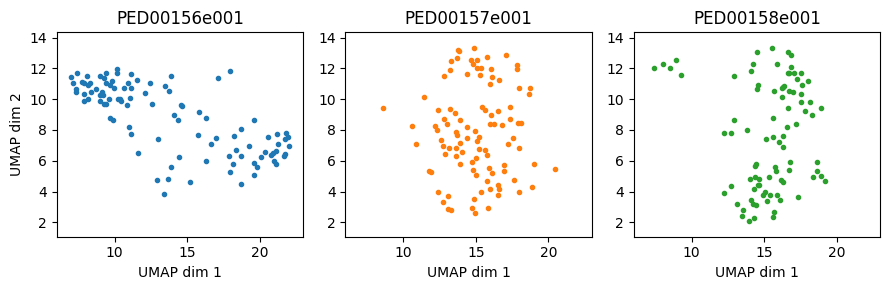

In [6]:
# Create a custom plot with the t-SNE features calculated via the IDPET API.
num_ensembles = len(analysis.ensembles)

fig, ax = plt.subplots(1, len(analysis.ensembles), figsize=(num_ensembles*3, 3))
concat_ens = np.concatenate([e.reduce_dim_data for e in analysis.ensembles], axis=0)
margin = 1.0
for i, ensemble in enumerate(analysis.ensembles):
    tsne_data = ensemble.reduce_dim_data
    ax[i].scatter(tsne_data[:,0], tsne_data[:,1], marker=".", color=f"C{i}")
    ax[i].set_title(ensemble.code)
    ax[i].set_xlabel("UMAP dim 1")
    if i == 0:
        ax[i].set_ylabel("UMAP dim 2")
    ax[i].set_xlim(concat_ens[:,0].min()-margin, concat_ens[:,0].max()+margin)
    ax[i].set_ylim(concat_ens[:,1].min()-margin, concat_ens[:,1].max()+margin)
plt.tight_layout()
plt.show()